# Data Science Project Workflow

## Project Overview
- **Objective**: Define the problem and goals of the project.
- **Milestones**: Data Collection, Exploration, Preprocessing, Advanced Analysis, Model Development, Deployment, and Final Documentation.

---

## Domain and Research Questions

### Domain of the Project
- Social Media Sentiment Analysis

### Research Questions to be Answered
1. **Question 1**: Create an NLP model for predicting Sentiment values for comments.
2. **Question 2**: is there any correlation with comment length and Sentiment values?
3. **Question 3**: 
4. [Add more questions if applicable]

---


## Student Information
- **Name**: Ahmed Mohsen Ahmed 
- **Email**: AA2200061@tkh.edu.eg
- **Role**: Data Science Student  
- **Institution**: [Insert Institution Name]

# Milestone 1: Data Collection, Exploration, and Preprocessing

## Data Collection
- Acquire a dataset from reliable sources (e.g., Kaggle, UCI Repository, or APIs).
- **Scraping Data**:
  - Increase dataset size through web scraping or APIs (e.g., Selenium, BeautifulSoup).
  - Explore public repositories or other accessible sources for additional data.

<h1>Scraping Data code From Reddit<h1>

In [9]:
#Scraping data from reddit about the election 2024

import praw
import pandas as pd

reddit=praw.Reddit(
    client_id="Raq1WTzBXzVbkVpKCmmFwA",
    client_secret="5mBPGIKnY74-p0tzaRoVgFrs94i4rw",
    user_agent="Scraper"
)

def fetch_comments(subreddit,p_limit=100):
    subreddit_obj=reddit.subreddit(subreddit)
    data=[]

    for post in subreddit_obj.hot(limit=p_limit):
        post.comments.replace_more(limit=0)
        post_id=post.id
        post_title= post.title
        for comment in post.comments.list():
            comment_id=comment.id
            user_id=comment.author.name if comment.author else'N/A'
            data.append([post_id,post_title,comment_id ,user_id,comment.body])
    return data
comments_data=fetch_comments("2024Election",p_limit=50)

df=pd.DataFrame(comments_data,columns=["Post ID","Post Title","Comment ID","User ID","Comment"])
df.to_csv("C:/Users/Dell/Desktop/Data science stuff/Project Data/Datasets/Election2024.csv",index=False)

print("Scaraping complete data has been saved in csv file")

Scaraping complete data has been saved in csv file


## Dataset Description
- Create a table to explain:
  - 
  - **Data Types**
  - **Descriptions**
  - **Potential Use in Analysis**

# Calculating comment length for datasets

In [28]:
#calculate length of comment
import pandas as pd

# Load the train and test datasets
train_df = pd.read_csv("C:\\Users\\Dell\\Desktop\\Data science stuff\\Project Data\\Datasets\\election data\\train.csv")
test_df = pd.read_csv("C:\\Users\\Dell\\Desktop\\Data science stuff\\Project Data\\Datasets\\election data\\test.csv")

# Add a new column for comment length
train_df["Comment Length"] = train_df["Comment"].apply(len)
test_df["Comment Length"] = test_df["Comment"].apply(len)

# Save the updated datasets
train_df.to_csv("C:\\Users\\Dell\\Desktop\\Data science stuff\\Project Data\\Datasets\\election data\\train.csv", index=False)
test_df.to_csv("C:\\Users\\Dell\\Desktop\\Data science stuff\\Project Data\\Datasets\\election data\\test.csv", index=False)

print("Updated train and test datasets with Comment Length saved!")


Updated train and test datasets with Comment Length saved!


## Putting the dataset with scrapped data

In [29]:
#Putting data together from train and test files excel

import pandas as pd
from sklearn.model_selection import train_test_split

# Load datasets
train_df = pd.read_csv("C:\\Users\\Dell\\Desktop\\Data science stuff\\Project Data\\Datasets\\election data\\train.csv")
test_df = pd.read_csv("C:\\Users\\Dell\\Desktop\\Data science stuff\\Project Data\\Datasets\\election data\\test.csv")
reddit_df = pd.read_csv("C:\\Users\\Dell\\Desktop\\Data science stuff\\Project Data\\Datasets\\Election2024.csv")  # Scraped data

# Split scraped data into 75% train and 25% test
reddit_train, reddit_test = train_test_split(reddit_df, test_size=0.25, random_state=42)

# Merge with existing train and test datasets
train_df = pd.concat([train_df, reddit_train], ignore_index=True)
test_df = pd.concat([test_df, reddit_test], ignore_index=True)

# Save updated datasets
train_df.to_csv("C:\\Users\\Dell\\Desktop\\Data science stuff\\Project Data\\Datasets\\election data\\train.csv", index=False)
test_df.to_csv("C:\\Users\\Dell\\Desktop\\Data science stuff\\Project Data\\Datasets\\election data\\test.csv", index=False)

print("Scraped data successfully merged into train.csv and test.csv!")


Scraped data successfully merged into train.csv and test.csv!


## Data Exploration
- Summary statistics (mean, median, variance).
- Identify missing values, duplicates, and outliers.
- Data distribution visualizations: histograms, box plots, scatter plots.

# Creating new coloum to measure lenght of each comment

In [10]:
# since data is mainly text we will measure length of comment then with number from each comment we can get mean median from it
df["Comment Length"]= df["Comment"].apply(len)

print(df[['Comment',"Comment Length"]].head)
df.to_csv("C:/Users/Dell/Desktop/Data science stuff/Project Data/Datasets/Election2024.csv",index=False)

<bound method NDFrame.head of                                                Comment  Comment Length
0    I can’t wait to vote for Harris/Walz!!\nAlread...             126
1    Seems odd to pretend that there's any serious ...             421
2    I’m sorry but I fail to understand? In what wo...             112
3    So, this may have been posted before, if so, f...             256
4    If trump doesn't win there will be a revolutio...             416
..                                                 ...             ...
453  Ill vote for you. (I dont live in the us and i...              57
454  :D thank you, you made me laugh. For the futur...              70
455  \n# *DOWNLOAD MOVIE "Once Upon a Time in the W...            4511
456  Not long enough for how important of a topic t...              53
457  Come on Trump went on about his shoes and then...            2282

[458 rows x 2 columns]>


# Calculating Mean, Median, Variance

In [11]:
# let get mean median and variance for these new values
mean_length=round(df["Comment Length"].mean(),2)
median_length=round(df["Comment Length"].median(),2)
variance_length=round(df["Comment Length"].var(),2)

print(f"Mean comment length was:{mean_length}")
print(f"Median comment length was:{median_length}")
print(f"variance comment length was:{variance_length}")


Mean comment length was:332.5
Median comment length was:139.0
variance comment length was:287114.08


# Handing missing Values

In [ ]:
#handling missing values
missing_value = df.isnull().sum()
print(f"Missing values in each column:\n{missing_value}")

# Drop rows with missing values
df = df.dropna()

# Remove comments that contain "[removed]"
df = df[df['Comment'].str.strip().str.lower() != "[removed]"]

df.to_csv("C:/Users/Dell/Desktop/Data science stuff/Project Data/Datasets/Election2024.csv", index=False)

print("Missing values handled, and '[removed]' comments deleted.")


Missing values in each column:
Post ID           0
Post Title        0
Comment ID        0
User ID           0
Comment           0
Comment Length    0
dtype: int64
Missing values handled, and '[removed]' comments deleted.


# Handing duplicated comments

In [13]:
#drop duplicated comments
df= df.drop_duplicates(subset=['Comment','User ID'],keep='first')
df.to_csv("C:/Users/Dell/Desktop/Data science stuff/Project Data/Datasets/Election2024.csv",index=False)
# handle duplicates
duplicates= df[df.duplicated(subset=['Comment'],keep =False)]

print(f"Number of duplicated comments:{duplicates}")

Number of duplicated comments:Empty DataFrame
Columns: [Post ID, Post Title, Comment ID, User ID, Comment, Comment Length]
Index: []


# Removing Outliers

In [15]:
#let identify outliers by calcualting the IQR 
Q1= df['Comment Length'].quantile(0.25)
Q3=df['Comment Length'].quantile(0.75)
IQR=Q3-Q1

lower_bound=Q1- 1.5 *IQR
upper_bound=Q3+1.5 *IQR

outliers=df[(df['Comment Length']<lower_bound)|(df['Comment Length']> upper_bound)]

print(f"Number of outliers:{len(outliers)}")
print(outliers[['Comment','Comment Length']].head)

df_clean= df[(df['Comment Length']>= lower_bound)&df['Comment Length']<=upper_bound]
df_clean.to_csv("C:/Users/Dell/Desktop/Data science stuff/Project Data/Datasets/Election2024.csv",index=False)

remaining_outliers=df_clean[(df_clean['Comment Length']>= lower_bound)&df_clean['Comment Length']<=upper_bound]
print(f"Remaining outliers:{len(remaining_outliers)}")

Number of outliers:39
<bound method NDFrame.head of                                                Comment  Comment Length
5    I'm an independent who believes balance is ess...            4162
9    The smart vote is for the Green party if you b...            1089
15   We have our Voters pamphlet and are waiting fo...             928
28   I'm an independent leaning voter by the way.\n...            1807
30   Republicans that endorse Kamala:\nGeraldo Rive...            1145
37   We live in terror of the Orange Retrovirus get...            1116
43   So....I think the evidence of what happened th...            2233
51   Lol. The wanting to end free speech literally ...            1431
52   Free speech:\nhttps://eu.statesman.com/story/n...            1238
56   My Dad is reading the paper. At some point he ...            1578
60   Oh that's terrible. Feeling a strong urge to t...            1726
68   I feel a somewhat similar cycle from being a l...             902
76   If we can't change a

# Making A visual diagrams using Matplotlib

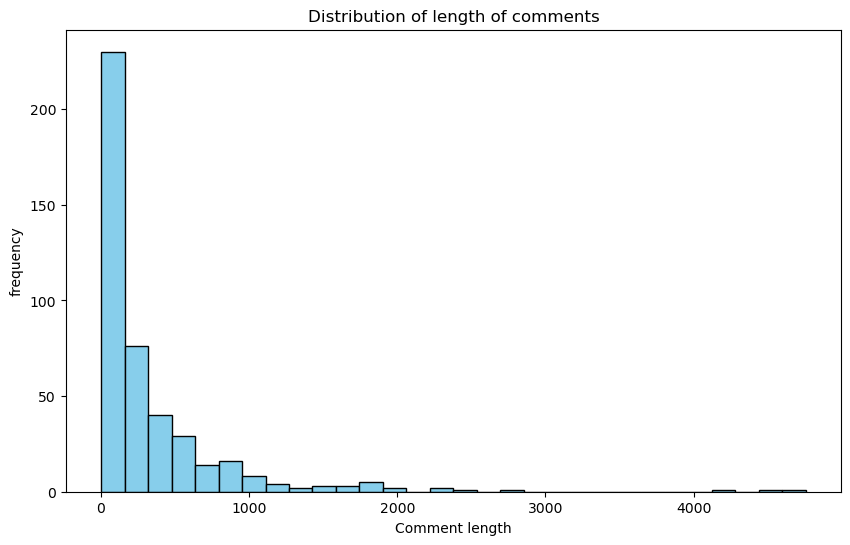

In [16]:
#let visulize data using matplot
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.hist(df_clean['Comment Length'],bins=30,color="skyblue",edgecolor='black')
plt.title("Distribution of length of comments")
plt.xlabel("Comment length")
plt.ylabel("frequency")
plt.show()

# Another plot diagram

In [1]:
# another matplot implementation for number of comments for each post top 20 

comment_counts=df_clean['Post ID'].value_counts()

plt.figure(figsize=(12,6))
comment_counts.head(20).plot(kind='bar',color="salmon")
plt.title("Number of comment per post (Top 20)")
plt.xlabel('Post ID')
plt.ylabel('Number of comments')
plt.show

NameError: name 'df_clean' is not defined

## Preprocessing and Feature Engineering
- Apply transformations (scaling, encoding, feature interactions).

In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

train_df = pd.read_csv("C:\\Users\\Dell\\Desktop\\Data science stuff\\Project Data\\Datasets\\election data\\train.csv")
test_df = pd.read_csv("C:\\Users\\Dell\\Desktop\\Data science stuff\\Project Data\\Datasets\\election data\\test.csv")

# Initialize the scaler
scaler = StandardScaler()

# Fit on train, transform both train and test
train_df['scaled_length'] = scaler.fit_transform(train_df[['Comment Length']])
test_df['scaled_length'] = scaler.transform(test_df[['Comment Length']])

# Save the updated files (optional)
train_df.to_csv("C:\\Users\\Dell\\Desktop\\Data science stuff\\Project Data\\Datasets\\election data\\train.csv", index=False)
test_df.to_csv("C:\\Users\\Dell\\Desktop\\Data science stuff\\Project Data\\Datasets\\election data\\test.csv", index=False)




---

# Milestone 2: Advanced Data Analysis and Feature Engineering

## Statistical Analysis
- Conduct tests such as t-tests, ANOVA, and chi-squared to explore relationships.

## Anova testing to see if different in mean of sentimal values

In [ ]:
# Making Anova test to see the difference 
import pandas as pd
from scipy.stats import f_oneway

df = pd.read_csv("C:\\Users\\Dell\\Desktop\\Data science stuff\\Project Data\\Datasets\\election data\\train.csv")

df['sentiment'] = df['sentiment'].str.lower()

# Separating the comment lengths by sentiment
positive = df[df['sentiment'] == 'positive']['Comment Length']
negative = df[df['sentiment'] == 'negative']['Comment Length']
neutral = df[df['sentiment'] == 'neutral']['Comment Length']

#Performing one-way ANOVA
f_stat, p_val = f_oneway(positive, negative, neutral)

print("ANOVA Results:")
print(f"F-statistic: {f_stat:.4f}")
print(f"P-value: {p_val:.4f}")

#Check if difference is there or not
if p_val < 0.05:
    print("There is a statistically significant difference in comment lengths between sentiment groups.")
else:
    print("There isn't a statistically significant difference in comment lengths between sentiment groups.")


ANOVA Results:
F-statistic: 4.1666
P-value: 0.0158
There is a statistically significant difference in comment lengths between sentiment groups.


## Doing chi squarred test to catogrize comment length

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

df = pd.read_csv("C:\\Users\\Dell\\Desktop\\Data science stuff\\Project Data\\Datasets\\election data\\train.csv")

def categorize_length(length):
    if length <= 50:
        return 'Short'
    elif 50 < length <= 150:
        return 'Medium'
    else:
        return 'Long'

df['Length Category'] = df['Comment Length'].apply(categorize_length)

#clean sentiment values incase there any spaces or uppercase letters
df['sentiment'] = df['sentiment'].astype(str).str.strip().str.lower()



contingency_table = pd.crosstab(df['Length Category'], df['sentiment'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

# Output
print("Contingency Table:\n", contingency_table)
print("\nChi-squared Test Results:")
print(f"Chi2 Statistic: {chi2:.2f}")
print(f"p-value: {p:.4f}")
print(f"Degrees of Freedom: {dof}")

df.to_csv("C:\\Users\\Dell\\Desktop\\Data science stuff\\Project Data\\Datasets\\election data\\train.csv", index=False)

Contingency Table:
 sentiment        -1    0    1
Length Category              
Long             48    5  108
Medium           71  230  279
Short            11   43   32

Chi-squared Test Results:
Chi2 Statistic: 95.41
p-value: 0.0000
Degrees of Freedom: 4


## Feature Engineering
- Create derived features based on domain knowledge.
- Apply transformations such as normalization, log scaling, or polynomial features.

In [7]:
from textblob import TextBlob
import pandas as pd

#function to apply transformation on the sentiment values text to numeric
def convert_sentiment(df):
    df['sentiment'] = df['Comment'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
    df['sentiment'] = df['sentiment'].apply(lambda x: 1 if x > 0 else (-1 if x < 0 else 0))
    return df


train_path = "C:\\Users\\Dell\\Desktop\\Data science stuff\\Project Data\\Datasets\\election data\\train.csv"
test_path = "C:\\Users\\Dell\\Desktop\\Data science stuff\\Project Data\\Datasets\\election data\\test.csv"

# Apply conversion
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

train_df = convert_sentiment(train_df)
test_df = convert_sentiment(test_df)

train_df.to_csv(train_path, index=False)
test_df.to_csv(test_path, index=False)

print("Transformed `sentiment` column in train.csv and test.csv")
print(train_df[['Comment', 'sentiment']].head())


Transformed `sentiment` column in train.csv and test.csv
                                             Comment  sentiment
0  Excited to see Kamala Harris leading the Democ...          1
1  Donald Trump's policies are the best for our e...          1
2  Jill Stein's environmental plans are exactly w...          1
3  Robert Kennedy offers a fresh perspective outs...          1
4  Chase Oliver's libertarian stance promotes tru...          1


## Data Visualization
- Generate insightful visualizations:
  - Correlation heatmaps, pair plots.
  - Trends and comparisons using bar charts, line charts, and dashboards.

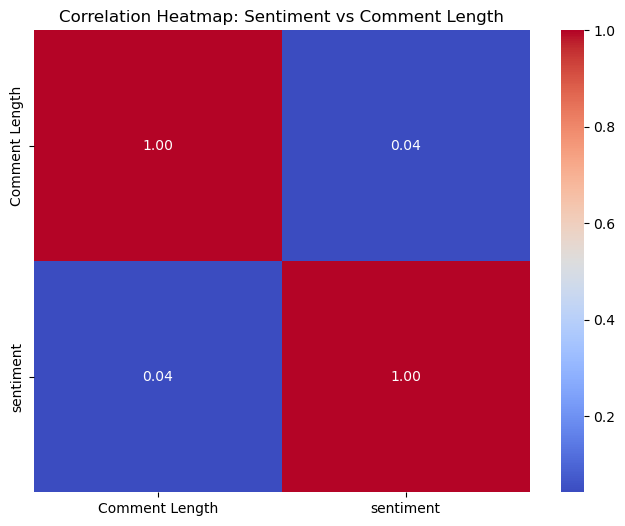

In [8]:
# we can visualize the colleration between comment length and sentimental value using heatmap
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("C:\\Users\\Dell\\Desktop\\Data science stuff\\Project Data\\Datasets\\election data\\train.csv")

def categorize_length(length):
    if length <= 50:
        return 'Short'
    elif 50 < length <= 150:
        return 'Medium'
    else:
        return 'Long'

df['Length Category'] = df['Comment Length'].apply(categorize_length)

#clean and ensure sentiment is numeric
if df['sentiment'].dtype == object:
    df['sentiment'] = df['sentiment'].str.strip().str.lower()
    sentiment_map = {'positive': 1, 'neutral': 0, 'negative': -1}
    df['sentiment'] = df['sentiment'].map(sentiment_map)


correlation_df = df[['Comment Length', 'sentiment']]

corr_matrix = correlation_df.corr()

#plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap: Sentiment vs Comment Length')
plt.show()



## Another graph to show

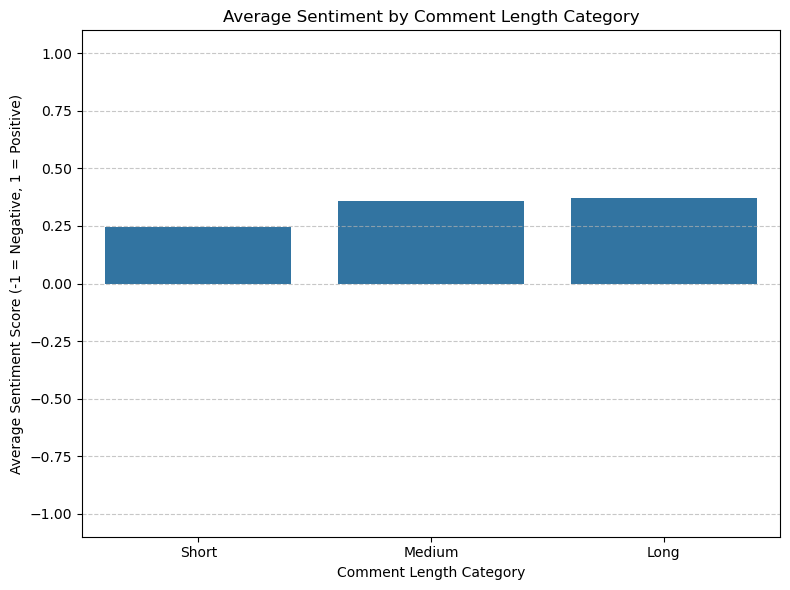

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("C:\\Users\\Dell\\Desktop\\Data science stuff\\Project Data\\Datasets\\election data\\train.csv")

# Ensure 'sentiment' is numeric
df['sentiment'] = pd.to_numeric(df['sentiment'], errors='coerce')

# Drop any rows with missing sentiment or length category
df = df.dropna(subset=['sentiment', 'Length Category'])

# Set proper category order
category_order = ['Short', 'Medium', 'Long']
df['Length Category'] = pd.Categorical(df['Length Category'], categories=category_order, ordered=True)

# Plot bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x='Length Category', y='sentiment', data=df, order=category_order, errorbar=None)
plt.title("Average Sentiment by Comment Length Category")
plt.xlabel("Comment Length Category")
plt.ylabel("Average Sentiment Score (-1 = Negative, 1 = Positive)")
plt.ylim(-1.1, 1.1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



---


# Milestone 3: Machine Learning Model Development and Optimization

## Model Selection
- Choose appropriate models for the problem type (classification, regression, clustering, etc.).


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.pipeline import Pipeline

## Model Training
- Split data into training, validation, and testing sets.
- Address imbalances using techniques like SMOTE or stratified sampling.

In [6]:
import joblib
train_df = pd.read_csv("C:\\Users\\Dell\\Desktop\\Data science stuff\\Project Data\\Datasets\\election data\\train.csv")
test_df = pd.read_csv("C:\\Users\\Dell\\Desktop\\Data science stuff\\Project Data\\Datasets\\election data\\test.csv")

train_df['sentiment'] = train_df['sentiment'].astype(int)
test_df['sentiment'] = test_df['sentiment'].astype(int)


X_train = train_df['Comment']
y_train = train_df['sentiment']
X_test = test_df['Comment']
y_test = test_df['sentiment']

# Create a pipeline: TF-IDF + Logistic Regression
model = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english')),
    ('clf', LogisticRegression(max_iter=1000))
])


model.fit(X_train, y_train)
joblib.dump(model, "sentiment_model.pkl")

y_pred = model.predict(X_test)
y_pred

array([ 1,  1,  1,  1,  0,  0,  1,  0,  0,  1,  0,  1,  0,  1,  0,  1,  1,
        0,  0,  1,  0,  1,  0,  0,  0, -1,  0,  0,  0,  0,  1,  1,  1,  0,
        1,  1,  1,  1,  0,  1,  1,  0, -1,  1,  1,  0,  1,  0,  1, -1,  1,
        1,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  0,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1])

## Model Evaluation
- Metrics to consider: Accuracy, Precision, Recall, F1-score, RMSE, etc.
- Visual tools: Confusion matrices, ROC curves.

In [ ]:
# Predict and evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       1.00      0.12      0.21        34
           0       0.96      0.56      0.71        43
           1       0.62      0.99      0.76        81

    accuracy                           0.68       158
   macro avg       0.86      0.55      0.56       158
weighted avg       0.79      0.68      0.63       158



## Hyperparameter Tuning
- Techniques: Grid Search, Random Search, or advanced methods like Bayesian Optimization.

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'tfidf__ngram_range': [(1, 1), (1, 2)],          # Unigrams or bigrams
    'tfidf__max_df': [0.75, 0.9, 1.0],               # Ignore very frequent words
    'tfidf__min_df': [1, 2],                         # Ignore very rare words
    'clf__C': [0.1, 1, 10],                          # Regularization strength
    'clf__penalty': ['l2'],                          # 'l2' works with most solvers
    'clf__solver': ['lbfgs']                         # Fast solver for small datasets
}

grid_search = GridSearchCV(
    model,                # Your pipeline
    param_grid,           # The grid we defined
    cv=5,                 # 5-fold cross-validation
    scoring='f1_macro',   # Or 'accuracy', 'f1_weighted' etc.
    n_jobs=-1,            # Use all available cores
    verbose=2             # Optional: shows progress
)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters: {'clf__C': 10, 'clf__penalty': 'l2', 'clf__solver': 'lbfgs', 'tfidf__max_df': 0.75, 'tfidf__min_df': 2, 'tfidf__ngram_range': (1, 2)}
Best Score: 0.6695786581571925
              precision    recall  f1-score   support

          -1       0.84      0.47      0.60        34
           0       0.82      0.74      0.78        43
           1       0.76      0.94      0.84        81

    accuracy                           0.78       158
   macro avg       0.81      0.72      0.74       158
weighted avg       0.79      0.78      0.77       158



## Model Comparison
- Compare multiple models and justify the final model selection.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, f1_score, classification_report

#Naive Bayes pipeline
nb_model = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english')),
    ('clf', MultinomialNB())
])

nb_model.fit(X_train, y_train)
nb_pred = nb_model.predict(X_test)

# Metrics comprasions
print("Logistic Regression Results: ")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score (macro):", f1_score(y_test, y_pred, average='macro'))
print(classification_report(y_test, y_pred))

print("\nNaive Bayes Results: ")
print("Accuracy:", accuracy_score(y_test, nb_pred))
print("F1 Score (macro):", f1_score(y_test, nb_pred, average='macro'))
print(classification_report(y_test, nb_pred))


Logistic Regression Results: 
Accuracy: 0.7848101265822784
F1 Score (macro): 0.7413467984361904
              precision    recall  f1-score   support

          -1       0.84      0.47      0.60        34
           0       0.82      0.74      0.78        43
           1       0.76      0.94      0.84        81

    accuracy                           0.78       158
   macro avg       0.81      0.72      0.74       158
weighted avg       0.79      0.78      0.77       158


Naive Bayes Results: 
Accuracy: 0.6708860759493671
F1 Score (macro): 0.5216967179584002
              precision    recall  f1-score   support

          -1       1.00      0.06      0.11        34
           0       1.00      0.53      0.70        43
           1       0.61      1.00      0.76        81

    accuracy                           0.67       158
   macro avg       0.87      0.53      0.52       158
weighted avg       0.80      0.67      0.60       158



## Visualization for Research Questions
- This section will include the visualizations that provide insights for the research questions defined earlier.  
- **Development Steps for Answering the Research Questions**:
  1. During **Exploratory Data Analysis (EDA)**, visualize initial patterns or trends related to the research questions.
  2. During **Model Evaluation**, provide visualizations to interpret model performance with respect to the research questions.
  3. During the **Final Analysis and Reporting**, present polished visualizations that summarize findings for each research question.

- Create the visualizations for each research question you defined, prove it or answer it, then add a markdown cell after each visual to comment and explain how the visual support your research question.

## Visualization for model performance

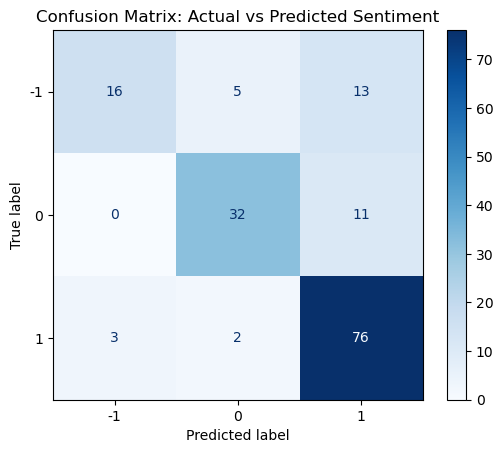

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Creating confusion matrix to visualize how model preformed 
cm = confusion_matrix(y_test, y_pred, labels=[-1, 0, 1])

# Display graph
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[-1, 0, 1])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix: Actual vs Predicted Sentiment")
plt.show()



---


# Milestone 4: Deployment and Monitoring

## Deployment
- Deploy the model as a REST API (Flask, FastAPI) or interactive dashboards (Streamlit, Dash).
- Host on cloud platforms (AWS, Azure, GCP) or local servers.

In [7]:
%%writefile app.py
import streamlit as st
import joblib

model = joblib.load("sentiment_model.pkl")

st.title("Sentiment Classifier")
st.write("Enter a comment to predict sentiment (-1: Negative, 0: Neutral, 1: Positive)")

text = st.text_area("Your Comment:")

if st.button("Predict"):
    if text.strip() == "":
        st.warning("Please enter a comment.")
    else:
        prediction = model.predict([text])[0]
        label = { -1: "Negative", 0: "Neutral", 1: "Positive" }.get(prediction, "Unknown")
        st.success(f"Predicted Sentiment: **{label}**")



Overwriting app.py



---


# Milestone 5: Final Documentation and Presentation

## Final Report
- Summarize all project phases, including methodologies and insights.
- Provide actionable recommendations based on findings.

## Final Presentation
- Create a presentation for stakeholders, highlighting key results.
- Include a demo of the deployed application or model.

## Future Improvements
- Suggest areas for enhancement:
  - Incorporating more diverse data.
  - Experimenting with additional algorithms.
  - Optimizing deployment for scalability.

---

# Additional Sections

## Challenges Faced
- Document key challenges encountered during the project lifecycle.

## Lessons Learned
- Reflect on insights and skills gained through the project.

## References
- List resources for datasets, tools, and techniques utilized.

---

# More Sections for Specific Projects

## Ethical Considerations
- Discuss privacy, fairness, or other ethical implications.

## Business Impact
- Highlight how the findings address the original objective.

## Team Contributions
- Acknowledge contributions from team members and collaborators.


---


# Reflection: Data Science Lifecycle Steps and Big Data

Reflect on which steps of the data science lifecycle can and cannot be effectively applied to big data, and justify your answers:

## Steps That Can Be Used with Big Data

Create a list for the steps that can be used with big data with how each step can be used, why is such step applicable and an example tool used for such step in big data world.

Include tools, methods, or technologies that make these steps scalable.

## Steps That Are Challenging with Big Data

Create a list for the steps that are challenging with big data with the solution for the challenge, why is such step challenging and an example tool used for such step in big data world.

Explain why these steps are difficult and suggest potential solutions.

## Recommendations for Big Data Projects

Create a list for the recommendations you have for other data scientists willing to take your project with a big data approach.

---